In [4]:
import pandas as pd

# Load just 100k rows for exploration (adjust as needed)
df = pd.read_csv("../metadata.csv", nrows=100000)

# Basic info
print("Shape:", df.shape)
print(df.info())
print(df.head())

# Missing values
print(df.isnull().sum().head(20))  # first 20 columns


C:\Users\User.DESKTOP-1GMR7ED\AppData\Local\Temp\ipykernel_12996\3467090763.py:4: DtypeWarning: Columns (1,5,6,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../metadata.csv", nrows=100000)


Shape: (100000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          100000 non-null  object 
 1   sha               58333 non-null   object 
 2   source_x          100000 non-null  object 
 3   title             99911 non-null   object 
 4   doi               100000 non-null  object 
 5   pmcid             79535 non-null   object 
 6   pubmed_id         53589 non-null   object 
 7   license           100000 non-null  object 
 8   abstract          70997 non-null   object 
 9   publish_time      100000 non-null  object 
 10  authors           90188 non-null   object 
 11  journal           95786 non-null   object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  0 non-null       float64
 14  arxiv_id          0 non-null       float64
 15  pdf_json_files    58333 non-null   object 
 16  p

In [2]:
import pandas as pd

# Load a manageable chunk (for example, first 100k rows)
df = pd.read_csv("../metadata.csv", nrows=100000, low_memory=False)

# Now safely convert publish_time
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Extract year
df['year'] = df['publish_time'].dt.year

print(df[['publish_time','year']].head())


  publish_time    year
0   2001-07-04  2001.0
1   2000-08-15  2000.0
2   2000-08-25  2000.0
3   2001-02-22  2001.0
4   2001-05-11  2001.0


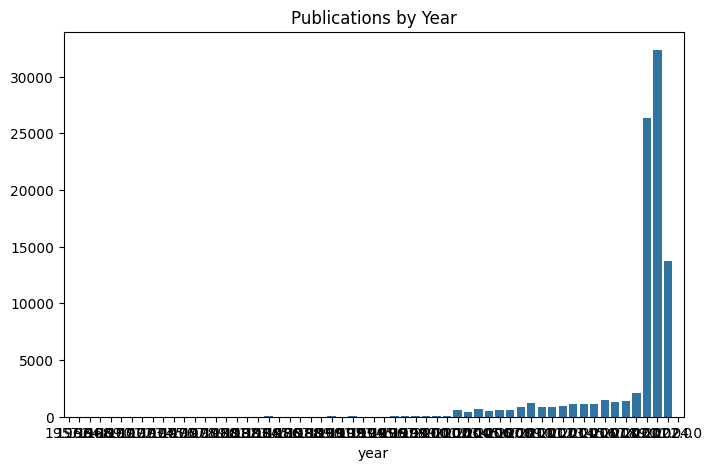

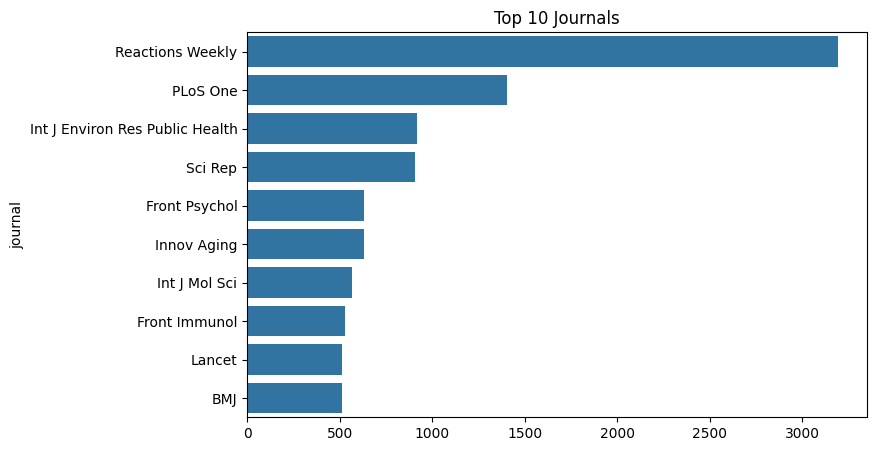

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Publications by year
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title("Publications by Year")
plt.show()

# Top journals
top_journals = df['journal'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(y=top_journals.index, x=top_journals.values)
plt.title("Top 10 Journals")
plt.show()


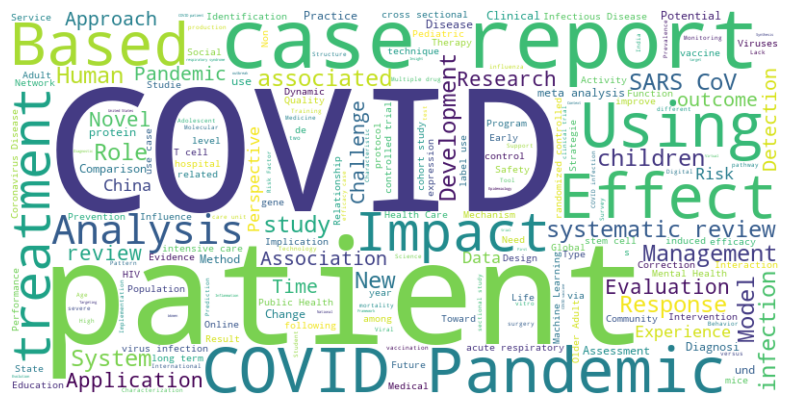

In [4]:
from wordcloud import WordCloud

text = " ".join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
